In [67]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv('..\\..\\Datasets\\concrete_data.csv')
df.sample()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
497,355.0,19.0,97.0,145.0,13.1,967.0,871.0,28,44.03


In [69]:
X = df.drop(columns=['Strength'])
y = df['Strength']

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Linear Reg before transformation

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [72]:
from sklearn.metrics import r2_score
r2_normal = r2_score(y_test,y_pred)
print('Normal r2 score: ', r2_normal)

Normal r2 score:  0.6275531792314848


In [73]:
from sklearn.model_selection import cross_val_score
r2_crossval = np.mean(cross_val_score(lr,X,y,scoring='r2'))
print('Crossval r2 score: ', r2_crossval)

Crossval r2 score:  0.4609940491662864


# Yeo Johnshon

In [74]:
from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(method='yeo-johnson')
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

# Linear Reg after transformation

In [75]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)

In [76]:
r2_normal = r2_score(y_test,y_pred)
print('Normal r2 score: ', r2_normal)

Normal r2 score:  0.8161906513339304


In [77]:
X_transformed = pt.fit_transform(X)

In [78]:
r2_crossval = np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))
print('Crossval r2 score: ', r2_crossval)

Crossval r2 score:  0.6834625134285748


In [79]:
pt.lambdas_

array([ 1.69544090e-01,  1.66330407e-02, -1.36479624e-01,  8.08438062e-01,
        2.64160212e-01,  1.12939492e+00,  1.83076345e+00,  1.77131924e-03])

In [80]:
pd.DataFrame({'cols': X_train.columns, 'yeo-johnson_lambdas':pt.lambdas_})

,cols,yeo-johnson_lambdas
0,Cement,0.169544
1,Blast Furnace Slag,0.016633
2,Fly Ash,-0.136480
3,Water,0.808438
4,Superplasticizer,0.264160
5,Coarse Aggregate,1.129395
6,Fine Aggregate,1.830763
7,Age,0.001771


# Before and after yeo-johnson

In [81]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

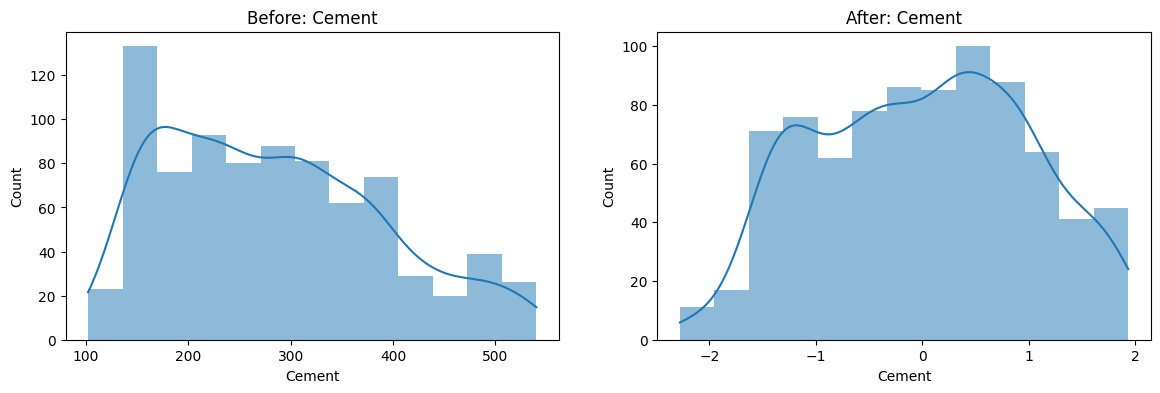

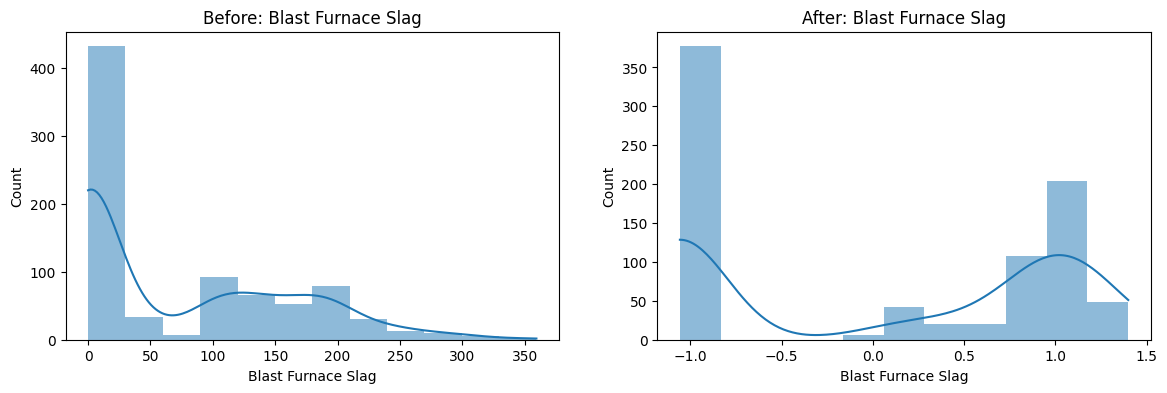

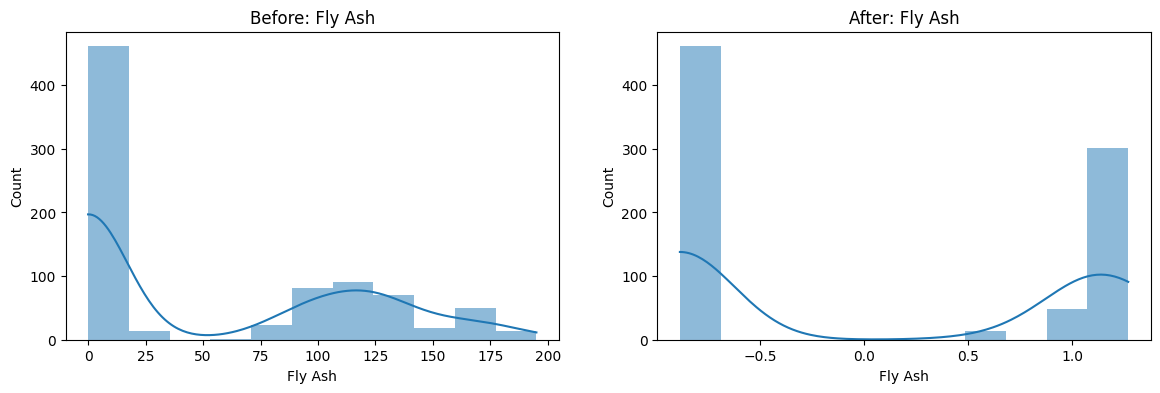

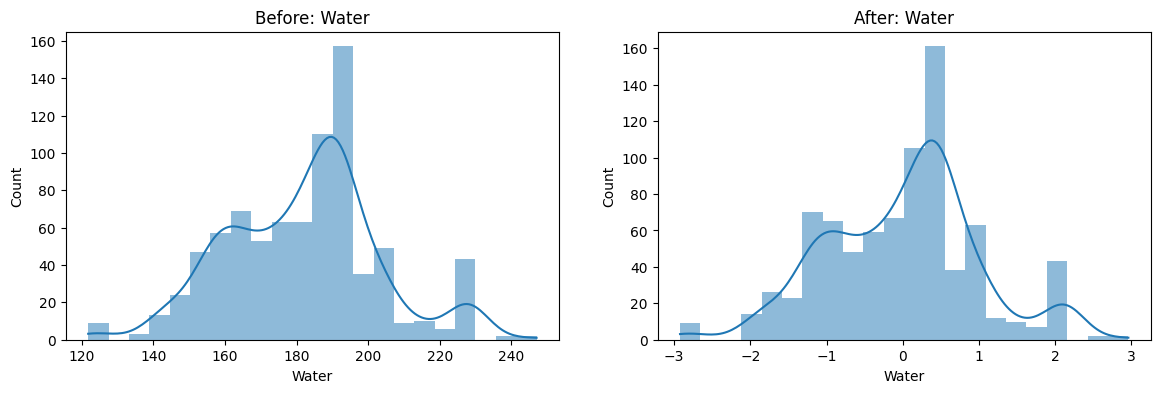

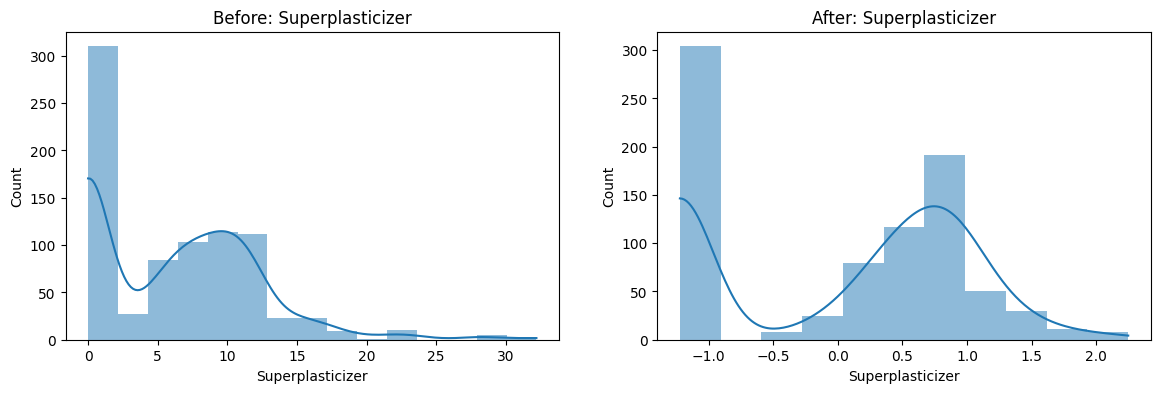

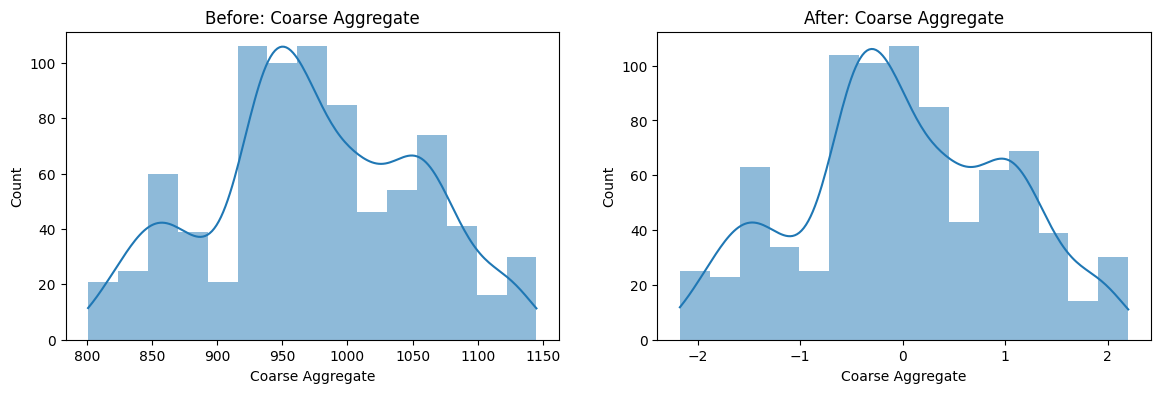

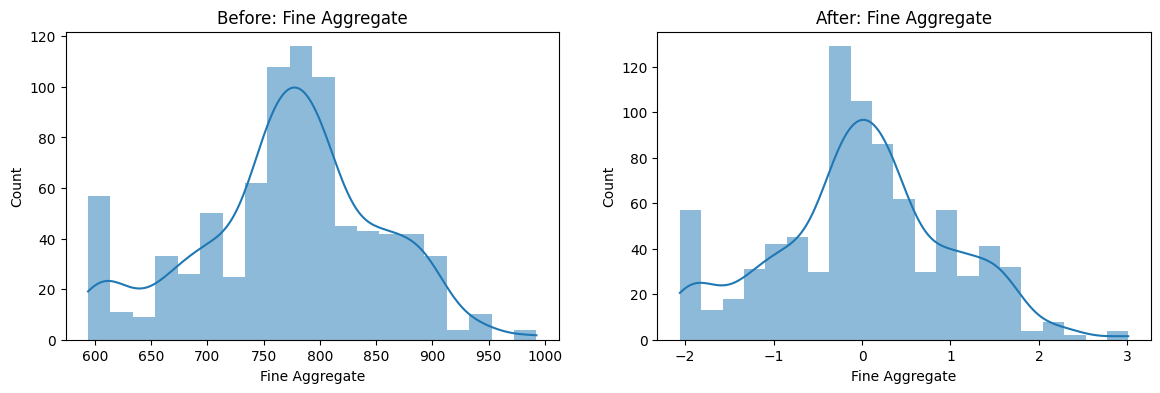

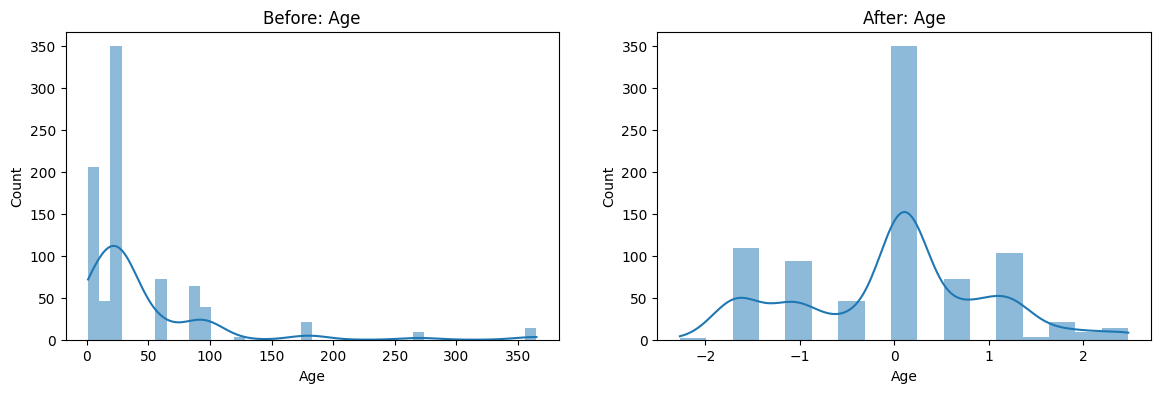

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(X_train[col], kde=True, edgecolor=None)
  plt.title(f'Before: {col}')

  plt.subplot(1,2,2)
  sns.histplot(X_train_transformed[col], kde=True, edgecolor=None)
  plt.title(f'After: {col}')